In [3]:
# Note: Data shall be scaled prior to training because by default option perform 'Regularization'.
# In this code, scaling is not done first time and scaling is done in the second iteration - this is for discussion purpose. 

In [4]:
import pandas as pd
#import numpy as np

import matplotlib.pyplot as plt   
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [5]:
# read file

pima_df = pd.read_csv("pima_diabetes.csv")

In [6]:
pima_df.head(10)

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [7]:
pima_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Preg    768 non-null    int64  
 1   Plas    768 non-null    int64  
 2   Pres    768 non-null    int64  
 3   Skin    768 non-null    int64  
 4   Test    768 non-null    int64  
 5   Mass    768 non-null    float64
 6   Pedi    768 non-null    float64
 7   Age     768 non-null    int64  
 8   Class   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
#Lets analysze the distribution of the various attributes
pima_df.describe()

,Preg,Plas,Pres,Skin,Test,Mass,Pedi,Age,Class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
# Let us look at the target column which is 'class' to understand how the data is distributed amongst the various values

pima_df['Class'].value_counts()
# Most are not diabetic. The ratio is almost 1:2 in favor or class 0.  The model's ability to predict class 0 will 
# be better than predicting class 1. 

0    500
1    268
Name: Class, dtype: int64

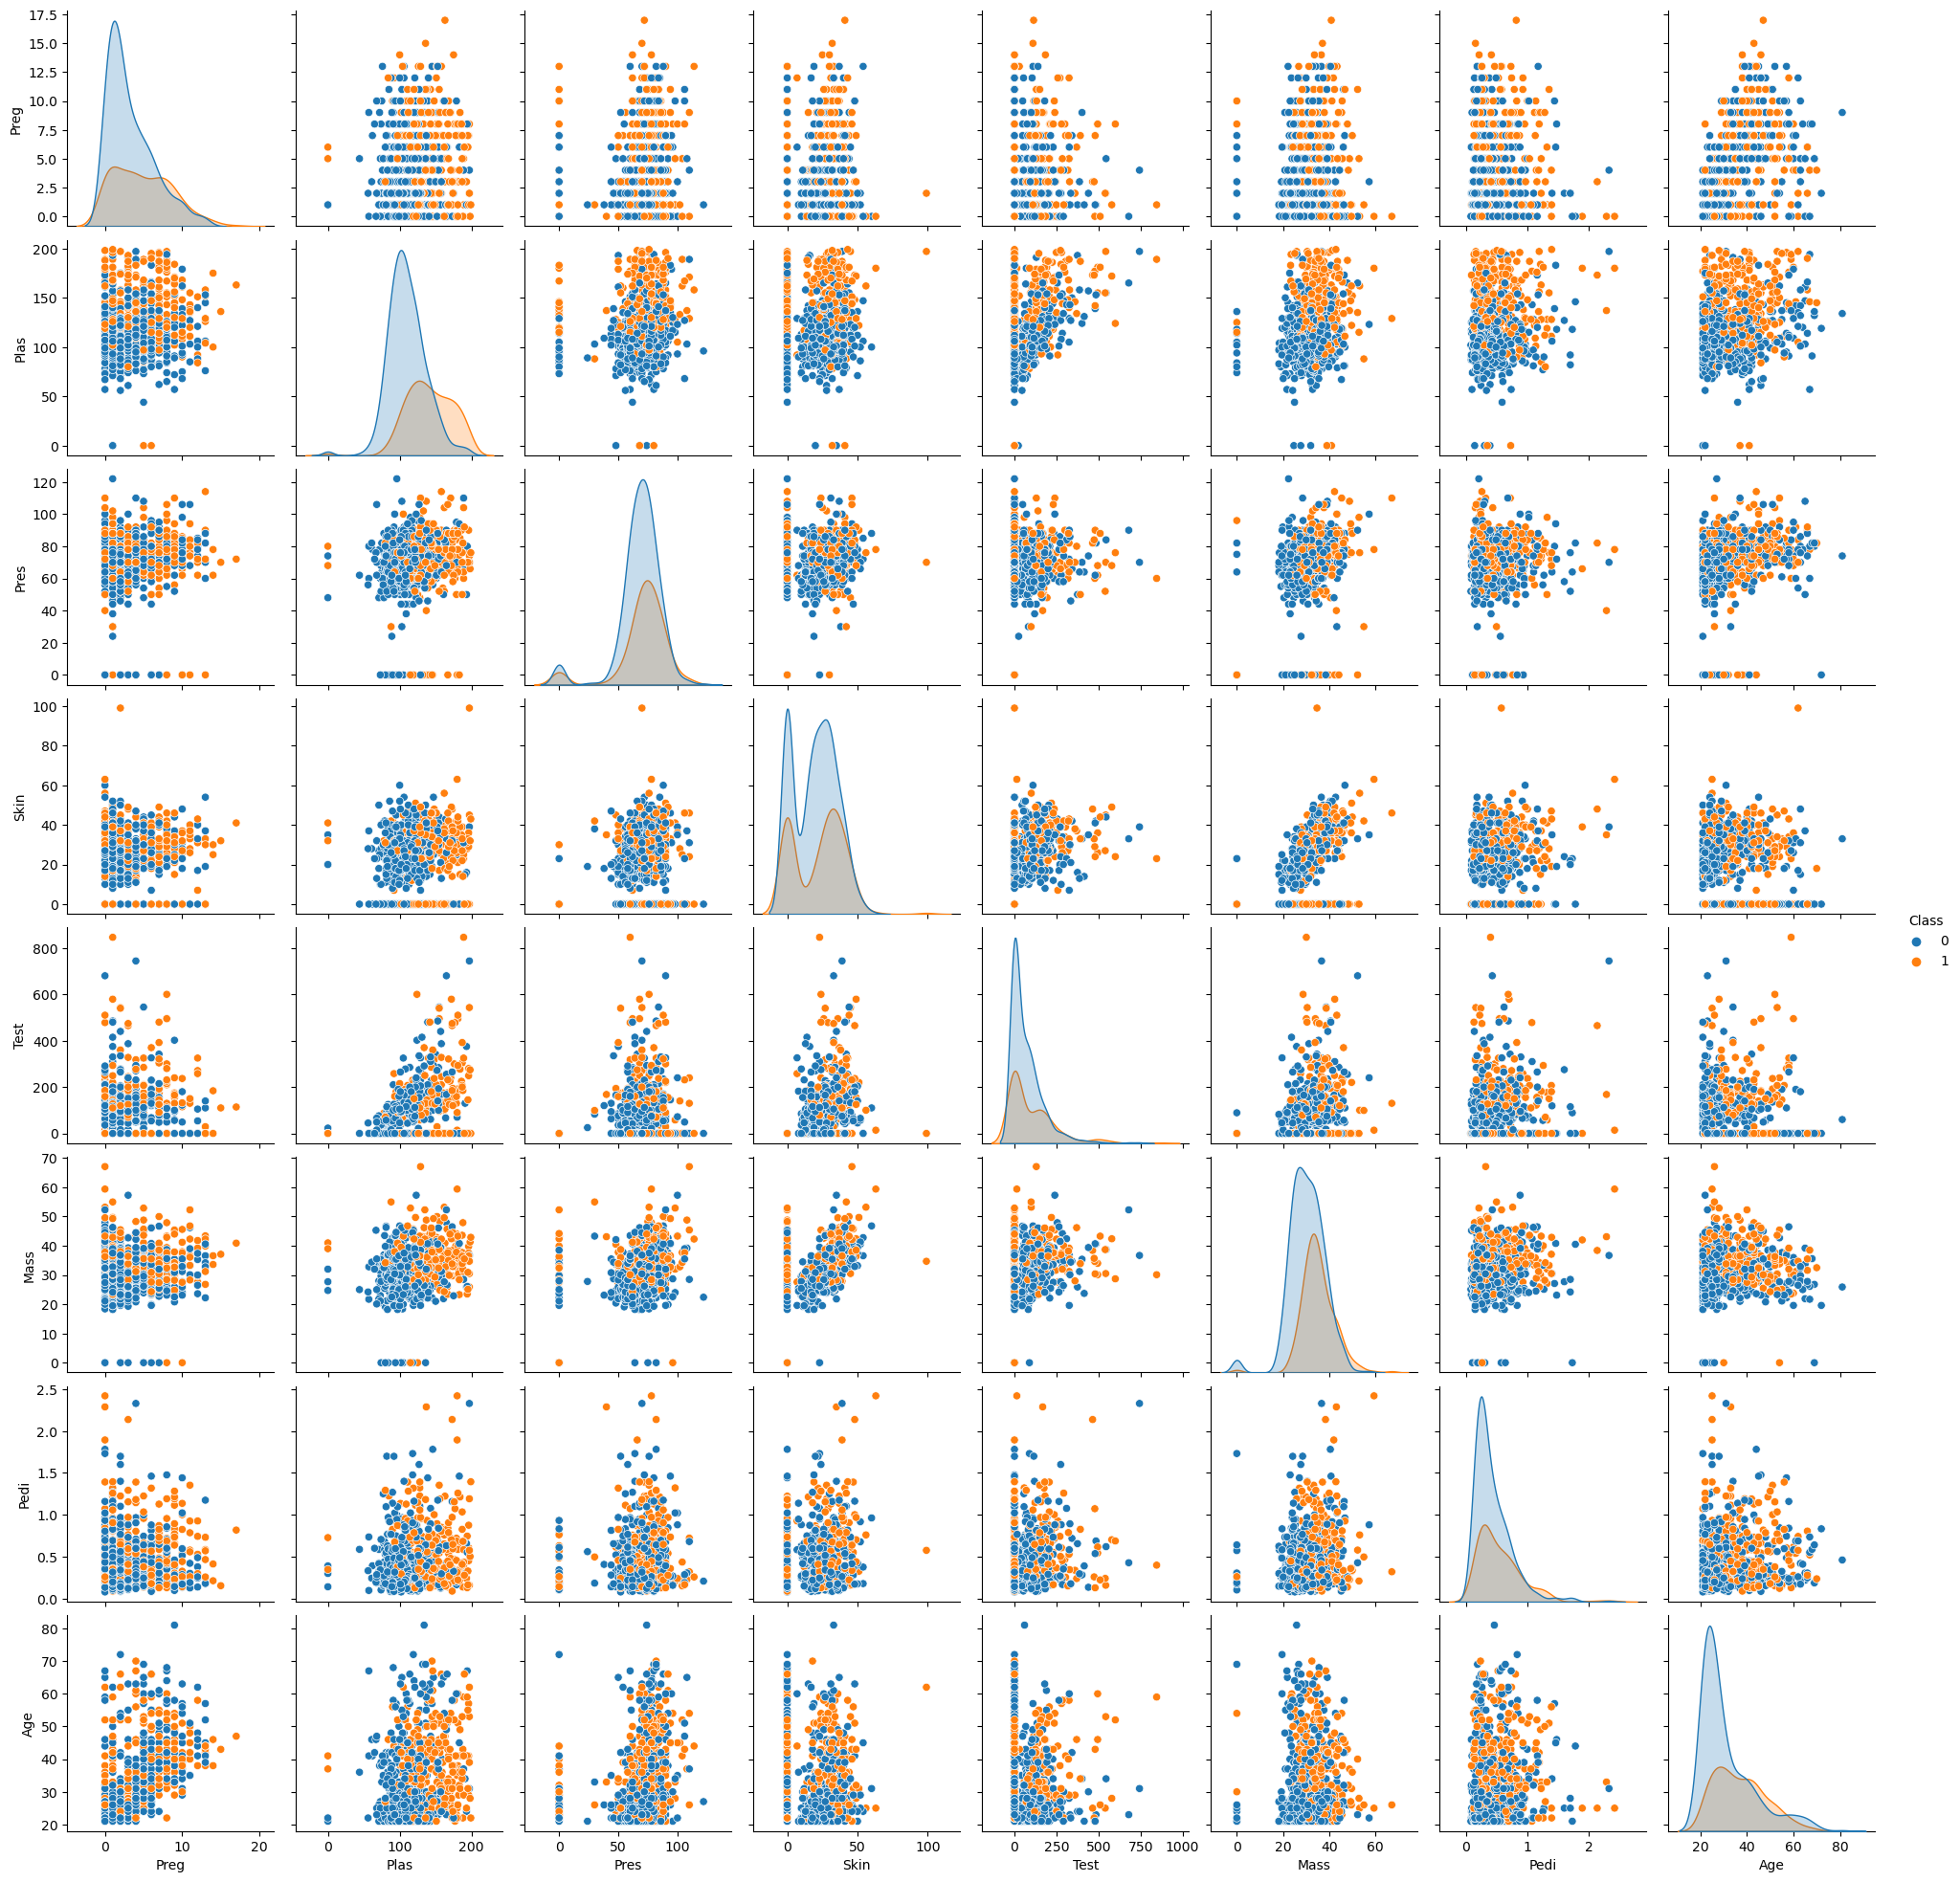

In [10]:
# Pairplot using sns

#sns.pairplot(pima_df, hue='Class', diag_kind="kde")
sns.pairplot(pima_df, diag_kind="kde", hue = "Class")

In [11]:
X = pima_df.drop(["Class"], axis=1)

In [12]:
y = pima_df["Class"]

In [13]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0, stratify=pima_df['Class'])
#print(X_train.head())
#print(y_train.head())

In [14]:
from sklearn.linear_model import LogisticRegression

# Fit the model 
### Solver 'liblinear' works well for small dataset.
### Else can go with new default in Python 'lbfgs'
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)


LogisticRegression(max_iter=200)

In [15]:
y_predict = model.predict(X_test)


In [16]:
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7746741154562383
0.7748917748917749
[[133  17]
 [ 35  46]]


In [17]:
print(metrics.classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       150
           1       0.73      0.57      0.64        81

    accuracy                           0.77       231
   macro avg       0.76      0.73      0.74       231
weighted avg       0.77      0.77      0.77       231



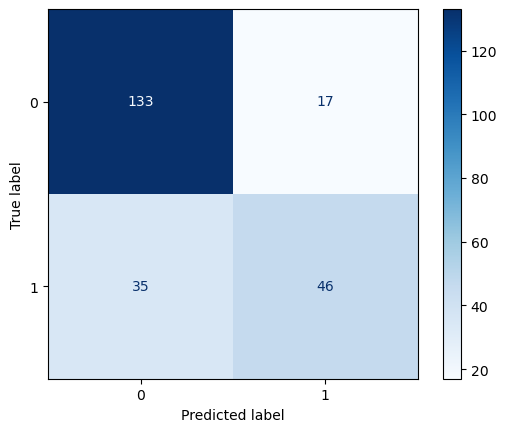

In [18]:
# Optional - Format the confustion matrix
metrics.ConfusionMatrixDisplay.from_predictions( y_test, y_predict, cmap='Blues')

In [19]:
# Format the Confustion Matrix (Old method)
#from sklearn.metrics import plot_confusion_matrix
#plot_confusion_matrix(model, X_test, y_test, cmap= plt.cm.Blues, values_format='d')


In [20]:
# Iteration 2 - Standard Scalar
# -----------
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()


# Iteration 3 - try with MinMax scalar
# -----------
#from sklearn.preprocessing import MinMaxScaler 
#scaler = MinMaxScaler() 


X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [21]:
# Fit the model on 30%
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_predict = model.predict(X_test_scaled)

print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7746741154562383
0.7748917748917749
[[134  16]
 [ 36  45]]


In [ ]:
# ***********************************************
# NOTE - Scaling is required because of 'Regularization' performed in Logistic Regression
# Do NOT use  Logistic Regression without scaling when using default parameters
# In this program it is done only for discussion purpose
# ***********************************************